In [1]:
import os
import numpy as np
import torch as pt
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from matplotlib import rcParams

import src as sp
import runtime as rt
from theme import colors

# font parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12

In [2]:
# parameters
n_min = 3000
#r = pt.linspace(pt.min(mdcb), pt.max(mdcb), 51)
r = pt.linspace(3.4, 8.2, 21)

# find outputs
data_filepaths = glob("results/data/*.pt")

# load data
data = {os.path.basename(fp).split('.')[0]:pt.load(fp) for fp in data_filepaths}

# pack output
p = pt.cat([data[key]['p'] for key in data])
y = pt.cat([data[key]['y'] for key in data])
dcb = pt.cat([data[key]['dcb'] for key in data])

In [5]:
list(data)[1]

'4eiy'

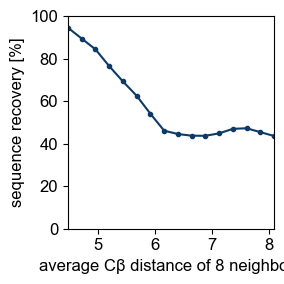

In [3]:
# correct predictions and average Cb distances
b = (pt.argmax(p, dim=1) == pt.argmax(y, dim=1)).float()
mdcb = pt.mean(dcb[:,:8], dim=1)

# bin predictions by Cb distances
mb = ((mdcb.unsqueeze(1) >= r[:-1].unsqueeze(0)) & (mdcb.unsqueeze(1) < r[1:].unsqueeze(0)))
x = 0.5*(r[:-1] + r[1:]).cpu().numpy()

# filter
m = (pt.sum(mb.float(), dim=0) > n_min)
x = x[m]
mb = mb[:,m]

# map results
b_l = [b[mb[:,i]].numpy() for i in range(mb.shape[1])]
bm = 1e2*np.array([np.mean(bi) for bi in b_l])

# plot
plt.figure(figsize=(3,3))
plt.plot(x, bm, '.-', color=colors[1])
plt.xlim(np.min(x), np.max(x))
plt.ylim(0, 100)
plt.xlabel('average Cβ distance of 8 neighbors')
plt.ylabel('sequence recovery [%]')
plt.tight_layout()
plt.savefig('graphs/sequence_recovery_core_to_surface.svg')
plt.show()

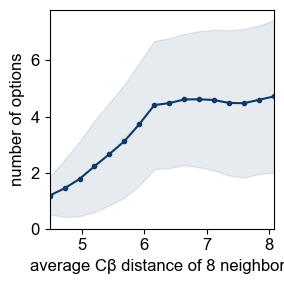

In [4]:
# correct predictions and average Cb distances
b = pt.sum((p >= 0.5).float(), dim=1)
mdcb = pt.mean(dcb[:,:8], dim=1)

# bin predictions by Cb distances
mb = ((mdcb.unsqueeze(1) >= r[:-1].unsqueeze(0)) & (mdcb.unsqueeze(1) < r[1:].unsqueeze(0)))
x = 0.5*(r[:-1] + r[1:]).cpu().numpy()

# filter
m = (pt.sum(mb.float(), dim=0) > n_min)
x = x[m]
mb = mb[:,m]

# map results
b_l = [b[mb[:,i]].numpy() for i in range(mb.shape[1])]
bm = np.array([np.mean(bi) for bi in b_l])
bs = np.array([np.std(bi) for bi in b_l])

# plot
plt.figure(figsize=(3,3))
plt.fill_between(x, bm-bs, bm+bs, color=colors[1], alpha=0.1)
plt.plot(x, bm, '.-', color=colors[1])
plt.xlim(np.min(x), np.max(x))
plt.ylim(0, 7.8)
plt.xlabel('average Cβ distance of 8 neighbors')
plt.ylabel('number of options')
plt.tight_layout()
plt.savefig('graphs/number_options_core_to_surface.svg')
plt.show()

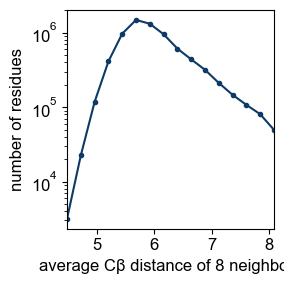

In [5]:
# correct predictions and average Cb distances
b = pt.sum((p >= 0.5).float(), dim=1)
mdcb = pt.mean(dcb[:,:8], dim=1)

# bin predictions by Cb distances
rb = ((mdcb.unsqueeze(1) >= r[:-1].unsqueeze(0)) & (mdcb.unsqueeze(1) < r[1:].unsqueeze(0))).float()
h = pt.sum(rb, dim=0)
x = 0.5*(r[:-1] + r[1:]).cpu().numpy()
dx = np.mean(np.diff(r))

# filter
m = (pt.sum(rb, dim=0) > n_min)
x = x[m]
#q = q[m]
h = h[m]

# plot
plt.figure(figsize=(3,3))
plt.semilogy(x,h,'.-', color=colors[1])
plt.xlim(np.min(x), np.max(x))
#plt.ylim(1, 7)
plt.xlabel('average Cβ distance of 8 neighbors')
plt.ylabel('number of residues')
plt.tight_layout()
plt.savefig('graphs/data_coverage_core_to_surface.svg')
plt.show()